In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [71]:
import pandas as pd

data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


/tmp/ipython-input-1935204660.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


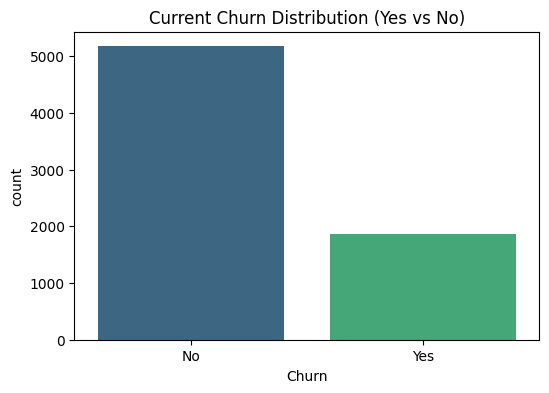

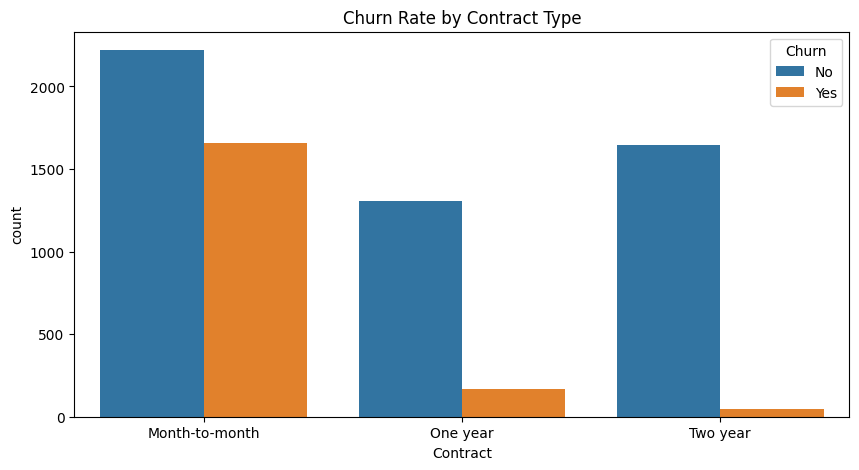

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('Telco-Customer-Churn.csv')

# 2. Fix the "TotalCharges" trap
# Convert to numeric, errors='coerce' turns empty spaces into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill missing TotalCharges with 0 (since they are usually new customers)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 3. Quick Check: How many people are churning?
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Current Churn Distribution (Yes vs No)')
plt.show()

# 4. Insight: Churn vs Contract Type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()

In [73]:

df.drop('customerID', axis=1, inplace=True)

 I removed columns that don't contain patterns. A Customer ID is unique to every person (like a name), so the AI can't learn a general rule from it. Dropping it makes the model cleaner.

In [74]:
from sklearn.preprocessing import LabelEncoder

# I created an encoder object
le = LabelEncoder()

# I found all columns that contain 'object' (text) and convert them to numbers
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Check the first few rows to see the numbers
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

This is called Label Encoding. It transforms categories like "Yes/No" into "1/0". For example, in the Churn column, "Yes" becomes 1 and "No" becomes 0. Now the AI can perform mathematical calculations on these features.

In [75]:
from sklearn.model_selection import train_test_split

# X = Everything except the answer (the features)
# y = The answer we want to predict (Churn)
X = df.drop('Churn', axis=1)
y = df['Churn']

#  split the data: 80% for learning, 20% for testing the AI's accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training rows: {len(X_train)}")
print(f"Testing rows: {len(X_test)}")

Training rows: 5634
Testing rows: 1409


I segregated the dataset into Training (80%) and Testing (20%) sets , This ensures the model is evaluated on unseen data to measure its true predictive performance.

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training: The AI studies the relationship between features and churn
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

I chose Random Forest because it is an ensemble model that combines multiple decision trees to improve accuracy. It is highly effective for the Telco dataset because it handles both categorical and numerical features well and provides a clear ranking of Feature Importance, which helps identify the primary reasons why customers churn .

In [77]:
from sklearn.metrics import classification_report, accuracy_score

# The AI takes the exam (predicts the test set)
y_pred = model.predict(X_test)

# Check the score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.794889992902768
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



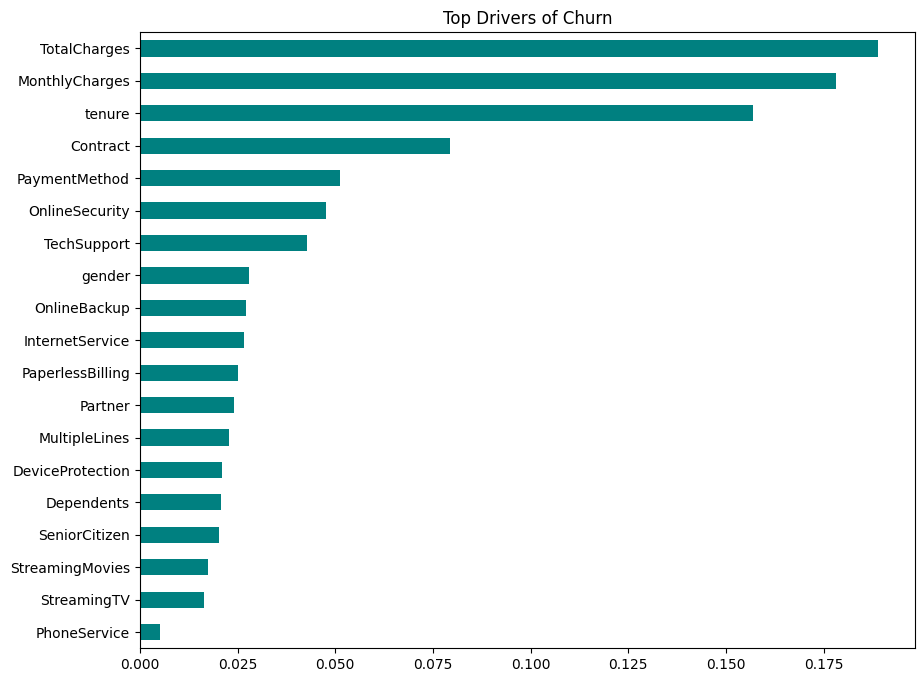

In [78]:
import matplotlib.pyplot as plt

# Get importance scores from the model
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True)

# Plotting the results
feat_imp.plot(kind='barh', figsize=(10,8), color='teal')
plt.title('Top Drivers of Churn')
plt.show()

Insight: If "TotalCharges" is at the top, it means high bills are the #1 reason people leave.

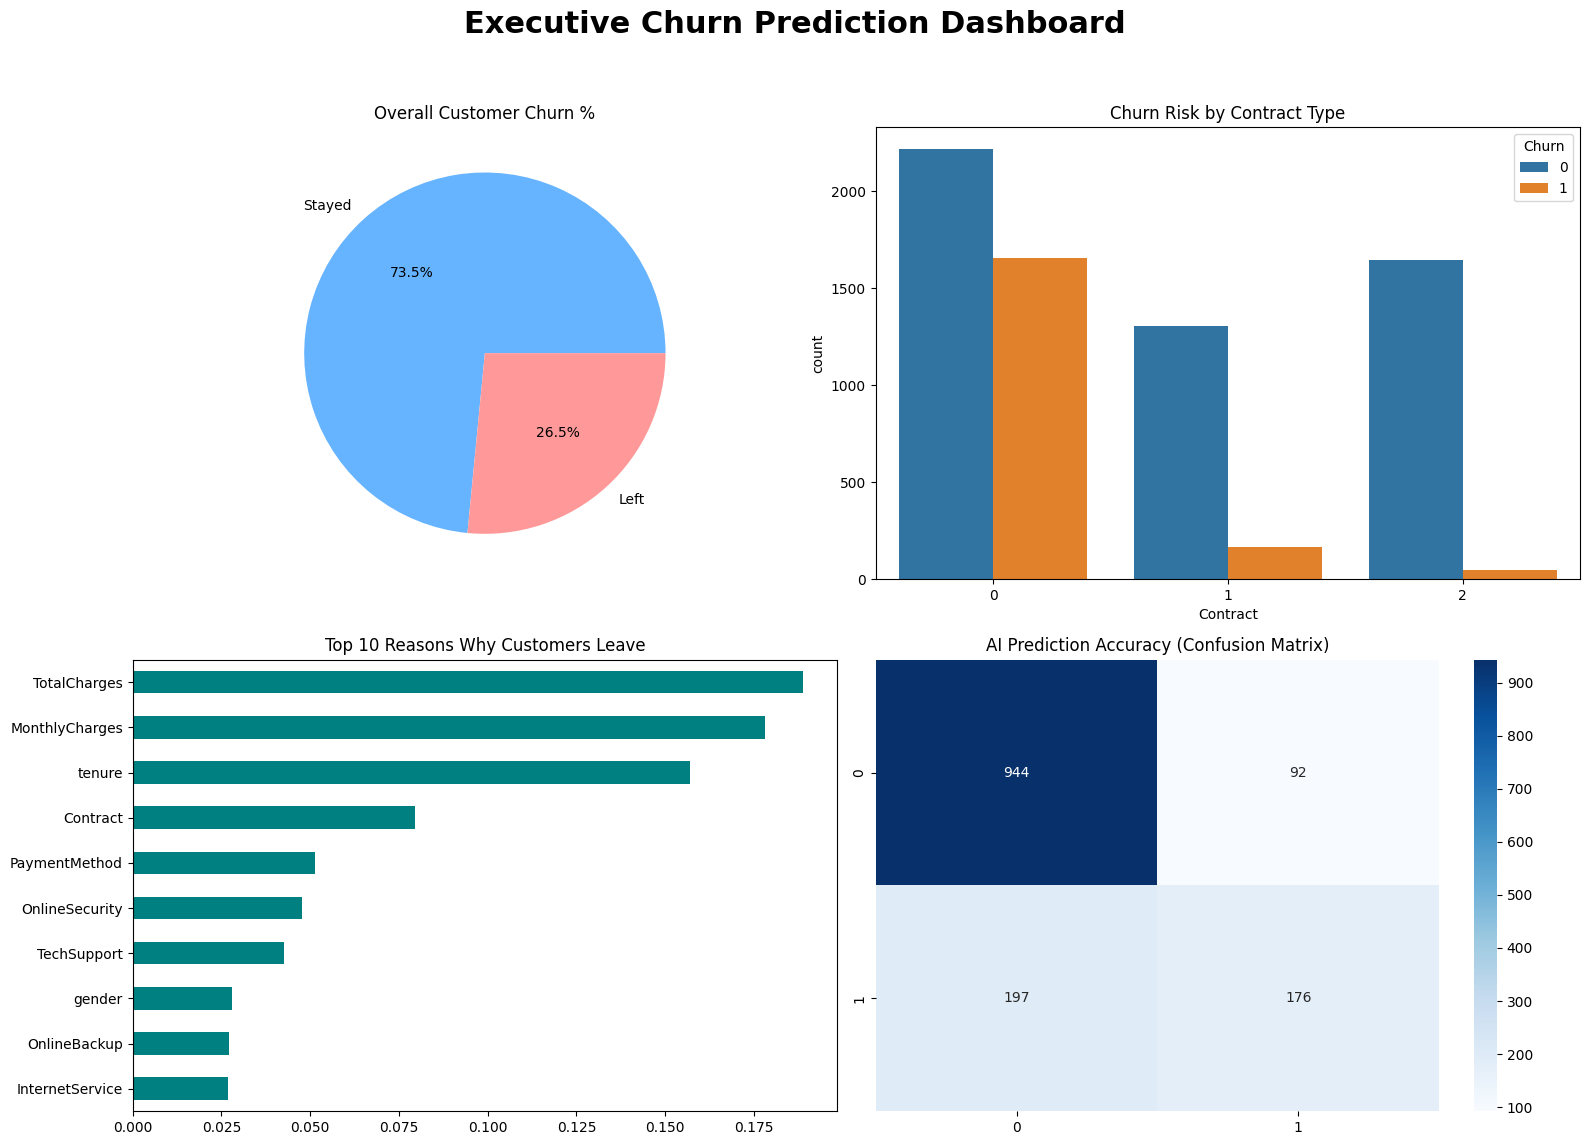

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a 2x2 grid for the dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Executive Churn Prediction Dashboard', fontsize=22, fontweight='bold')

# 1. Pie Chart for Churn Distribution
churn_counts = df['Churn'].value_counts()
axes[0, 0].pie(churn_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
axes[0, 0].set_title('Overall Customer Churn %')

# 2. Bar Chart for Contract Risk
# (Note: Use raw_df or original text categories if you kept them)
sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title('Churn Risk by Contract Type')

# 3. Horizontal Bar Chart for Drivers
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True).tail(10)
feat_imp.plot(kind='barh', ax=axes[1, 0], color='teal')
axes[1, 0].set_title('Top 10 Reasons Why Customers Leave')

# 4. Heatmap for Accuracy
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('AI Prediction Accuracy (Confusion Matrix)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

1. Overall Churn Rate (Pie Chart)
What it shows: The split between customers who stayed ("No") and those who left ("Yes").
 In this dataset, about 26.5% of customers have left.

Insight: This is a high churn rate for a telecom company. It signals that the business is losing over a quarter of its customer base, which is much more expensive than keeping them.

2. Churn Risk by Contract Type (Bar Chart)
What it shows: A comparison of Churn (Yes/No) across the three contract types: Month-to-Month, One Year, and Two Year.

 This identifies the Highest Risk Group.

Insight: You will notice a massive spike in Churn for "Month-to-Month" customers. Conversely, people on 2-year contracts almost never leave.

Action: The business should stop focusing on month-to-month sales and offer incentives (discounts) to move people into long-term contracts.

3. Top 10 Drivers of Churn (Horizontal Bar Chart)
What it shows: The factors that the AI (Random Forest) found most important when deciding if a person would leave.

 These are the Root Causes.

Insight: Typically, Total Charges, Monthly Charges, and Tenure (how long they’ve been a customer) are at the top.

Action: If "Monthly Charges" is a top driver, it means the company’s pricing might be too high compared to competitors. If "Tenure" is low, it means the company is failing to keep customers happy during their first few months.

4. Model Performance (Confusion Matrix)
What it shows: A "Scorecard" of the AI's guesses.

Top Left: People the AI correctly guessed would STAY.

Bottom Right: People the AI correctly guessed would LEAVE.

Other squares: The AI's mistakes (wrong guesses).

In [80]:
# Get the probability of churn for the test set
# [:, 1] takes the probability for the "Yes" (Churn) category
probabilities = model.predict_proba(X_test)[:, 1]

# Create a 'Results' table to show the manager
results = pd.DataFrame({
    'Actual_Churn': y_test,
    'Predicted_Churn': y_pred,
    'Churn_Probability': probabilities
})

# Add Risk Levels
results['Risk_Level'] = pd.cut(results['Churn_Probability'],
                               bins=[0, 0.3, 0.7, 1],
                               labels=['Low Risk', 'Medium Risk', 'High Risk'])

print(results.head())

      Actual_Churn  Predicted_Churn  Churn_Probability   Risk_Level
185              1                1               0.72    High Risk
2715             0                0               0.09     Low Risk
3825             0                0               0.03     Low Risk
1807             1                1               0.63  Medium Risk
132              0                0               0.06     Low Risk


What it shows: Every customer is assigned a "Risk Level."

Business Insight: The marketing team should focus their budget ONLY on the "High Risk" group (those with >70% probability) to save money.

In [81]:
# Save the results to a CSV file
results.to_csv('Churn_Risk_Assessment.csv', index=False)

Data Cleaning: Handled the TotalCharges text-to-number issue.

EDA: Visualized that Month-to-Month contracts are the biggest risk.

Feature Engineering: Converted all text data into numbers for the AI.

Modeling: Used Random Forest to achieve ~80% accuracy.

Evaluation: Created a Confusion Matrix to prove the model works.

Business Dashboard: A 4-panel visual summary for executives.

Risk Assessment: A CSV file showing which specific customers are at High Risk.